In [1]:
import sys
sys.path.append('path_to_ratbox')

import ratbox
import gymnasium as gym

import matplotlib.pyplot as plt

C:\Users\maddy\anaconda3\lib\site-packages\gymnasium\envs\registration.py:498: UserWarning: WARN: Overriding environment GymV26Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Lists of actions which will get the agent to the goal, so long as there are no obstacles in the environment

In [2]:
action_dict = {"wall":[[0,10,0,0],[0,10,0,0],[0,10,0,0],[0,10,0,0],
                      [0,5,5,0],[0,5,6,0],[0,0,10,0],[0,0,10,0],[0,0,10,0],[0,0,10,0]],
              "blocks":[[0,10,10,0],[0,10,10,0],[0,10,10,0],[0,10,10,0],[0,10,10,0],
                       [0,10,10,0],[0,10,10,0],[0,10,10,0],[0,10,10,0],[0,10,10,0],]}

Set the steering model and corresponding list of actions

In [3]:
env_type = "blocks" #"wall", "blocks"

actions = action_dict[env_type]

Create the environment

In [4]:
env = gym.make(f"RatBox-{env_type}-v0", render_mode = "rgb_array", steering = "compass")

C:\Users\maddy\anaconda3\lib\site-packages\gymnasium\envs\registration.py:555: UserWarning: WARN: The environment RatBox-blocks-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Always reset the environment first. Plot the rgb array so we can see the rat moving around.

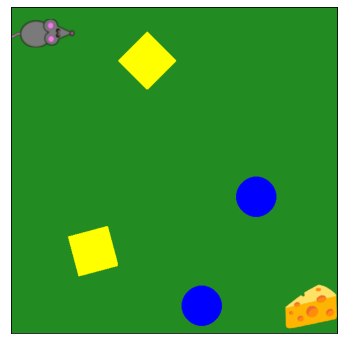

In [5]:
env.reset()
fig, ax = plt.subplots(figsize=(6,6), frameon=False)
ax.imshow(env.render())

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

fig.savefig(f"..\\gifs\\{env_type}room.png", bbox_inches="tight")

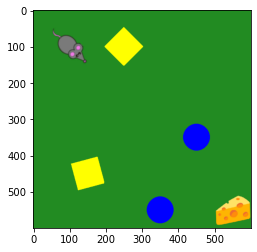

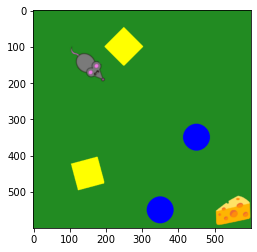

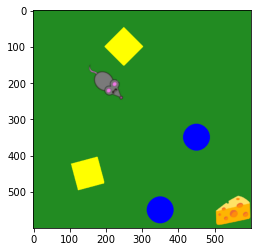

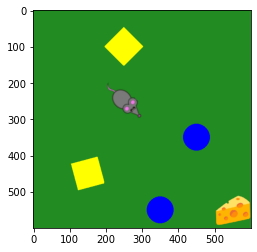

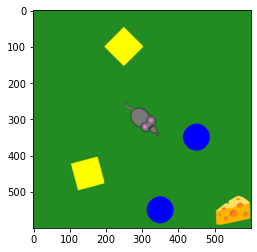

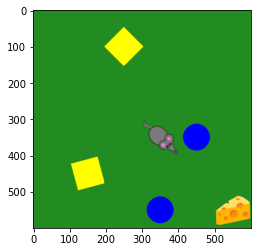

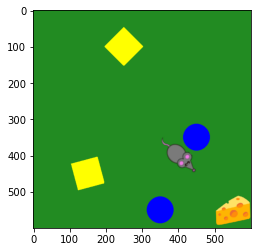

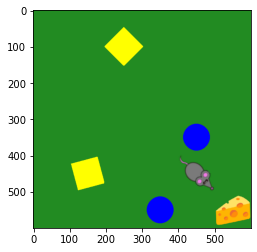

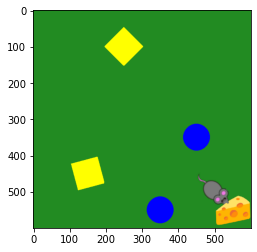

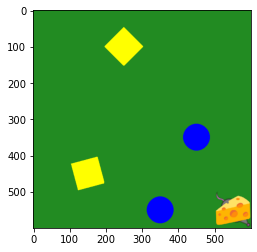

In [6]:
obsList = []
for act in actions:
    obs = env.step(act)
    obsList.append(obs)
    plt.imshow(env.render())
    plt.show()

Let's have a look at the state observations on the final trial.

In [7]:
obsList[-1]

(array([549.95460213, 549.95460213, -45.        , 550.        ,
        550.        ]),
 99.982,
 True,
 False,
 {})

In [8]:
print(f'The rat reached location {obsList[-1][0][:2]} and is facing the direction {obsList[-1][0][2]} degrees from the x axis. The goal is at location {obsList[-1][0][3:]}.')

if obsList[-1][2]:
    print(f'The rat reached the goal and got a reward of {obsList[-1][1]}.')
else:
    print('The rat did not reach the goal.')

The rat reached location [549.95460213 549.95460213] and is facing the direction -45.0 degrees from the x axis. The goal is at location [550. 550.].
The rat reached the goal and got a reward of 99.982.
